Accuracy on training set: 0.962
Accuracy on test set: 0.978


d:\anaconda3\envs\python3_6\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


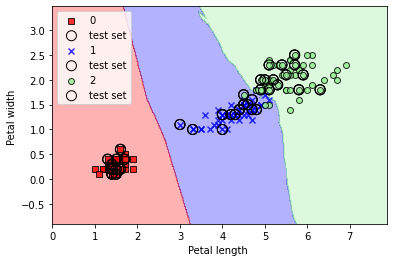

In [11]:
# １
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

# Irisデータセットをロード
iris = datasets.load_iris()
# 3、4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# k-NNのインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
# k-NNのモデル学習
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
# 結果の表示
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('Petal length ')
plt.ylabel('Petal width ')
plt.legend(loc='upper left')



lr.coef_: [[0.41026053]]
lr.intercept_: [-0.33972228]
Training set score: 0.93
Test set score: 0.92


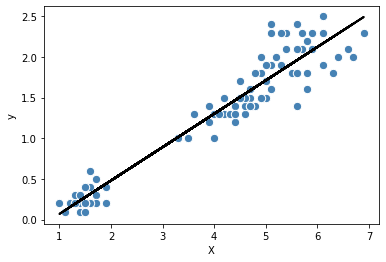

In [6]:
# 2
# 線形回帰
# ライブラリのインポート
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return
# データセットの生成
# Irisデータセットをロード
iris = datasets.load_iris()
# 3列目の特徴量を抽出
X = iris.data[:, [2]]
# 4列目の特徴量を抽出
y = iris.data[:, [3]]
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
# 線形回帰を用いた学習
lr = LinearRegression().fit(X_train, y_train)
# 傾きと切片の表示
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
# R2スコアの表示
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# 結果のプロット
lin_regplot(X_train, y_train, lr)
plt.xlabel('X')
plt.ylabel('y')
# 出力したデータを保存
# plt.savefig('images_LR.png', dpi=300)
plt.show()